# Tutorial: An Intuitive Introduction to Decision Trees

Sejauh ini, kita telah fokus pada model *linear*. Model-model ini mencoba menemukan satu persamaan matematis global (seperti garis atau kurva) yang paling cocok untuk seluruh dataset.

Sekarang, kita akan beralih ke pendekatan yang sama sekali berbeda. **Decision Trees (Pohon Keputusan)** tidak mencoba menemukan satu formula besar. Sebaliknya, mereka bekerja seperti cara manusia sering membuat keputusan: dengan mengajukan serangkaian pertanyaan "Ya/Tidak" yang sederhana.

Di notebook ini, kita akan membangun pemahaman dasar tentang cara kerja Decision Tree tanpa matematika yang rumit.

![Ilustrasi struktur Decision Tree](images/decision-tree-annotated.png)

---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Menjelaskan cara kerja Decision Tree menggunakan analogi sederhana.
* Mengidentifikasi komponen-komponen utama dari sebuah pohon: **Root, Nodes, Branches, dan Leaves**.
* Memahami bagaimana Decision Tree membuat prediksi untuk masalah **regresi**.


---
### 2. Analogi: Permainan Tebak Harga Rumah

Bayangkan Anda mencoba menebak harga sebuah rumah. Anda mungkin akan mengajukan serangkaian pertanyaan untuk mempersempit tebakan Anda.

1.  **Pertanyaan 1:** "Apakah lokasinya di pusat kota?"
    * **Jika Ya:** Anda tahu harganya mungkin lebih mahal.
    * **Jika Tidak:** Anda tahu harganya mungkin lebih murah.

2.  **Jika Ya (di pusat kota), Pertanyaan 2:** "Apakah luasnya lebih dari 150 m²?"
    * **Jika Ya:** Anda menebak harganya sangat mahal, mungkin sekitar 2 Miliar.
    * **Jika Tidak:** Anda menebak harganya cukup mahal, mungkin sekitar 1.2 Miliar.

3.  **Jika Tidak (bukan di pusat kota), Pertanyaan 3:** "Apakah rumahnya baru (kurang dari 5 tahun)?"
    * **Jika Ya:** Anda menebak harganya sedang, mungkin sekitar 800 Juta.
    * **Jika Tidak:** Anda menebak harganya lebih murah, mungkin sekitar 500 Juta.

Proses tanya jawab ini dapat digambarkan sebagai sebuah **pohon keputusan**.


---
### 3. Anatomi Pohon Keputusan

Mari kita petakan analogi kita ke terminologi resmi.



* **Root Node (Simpul Akar):** Pertanyaan paling pertama yang membagi seluruh data. Dalam contoh kita, ini adalah "Apakah lokasinya di pusat kota?".

* **Decision Node (Simpul Keputusan):** Simpul mana pun yang mengajukan pertanyaan dan memecah data lebih lanjut (misalnya, "Apakah luasnya > 150 m²?").

* **Branch / Edge (Cabang):** Panah yang menghubungkan pertanyaan dengan jawaban (misalnya, cabang "Ya" dan "Tidak").

* **Leaf Node / Terminal Node (Simpul Daun):** Simpul paling akhir yang tidak lagi mengajukan pertanyaan. Ini adalah titik di mana **prediksi akhir dibuat** (misalnya, "Tebak 1.2 Miliar").


---
### 4. Bagaimana Decision Tree Membuat Prediksi Regresi?

Ini adalah bagian kuncinya. Untuk masalah klasifikasi, *leaf node* akan berisi prediksi kategori (misalnya, "Selamat" atau "Tidak Selamat"). Tapi bagaimana dengan regresi?

Sangat sederhana:

> **Prediksi di sebuah *leaf node* adalah nilai RATA-RATA dari semua sampel data pelatihan yang jatuh ke dalam *leaf* tersebut.**

Mari kita lihat kembali analogi kita. Misalkan saat melatih model:
* Ada 20 rumah di pusat kota dengan luas > 150 m². **Rata-rata harga** dari 20 rumah ini adalah 2 Miliar. Maka, *leaf node* tersebut akan selalu memprediksi **2 Miliar**.
* Ada 50 rumah di pinggir kota yang sudah tua. **Rata-rata harga** dari 50 rumah ini adalah 500 Juta. Maka, *leaf node* tersebut akan selalu memprediksi **500 Juta**.

Jadi, Decision Tree Regressor pada dasarnya **membagi data menjadi beberapa kelompok, dan untuk setiap kelompok, ia hanya menebak nilai rata-ratanya.**


---
### 5. Visualisasi Cara Kerja

Mari kita lihat bagaimana ini terlihat dalam praktik. Kita akan membuat data sederhana dan melatih Decision Tree yang sangat "dangkal" (`max_depth=2`).


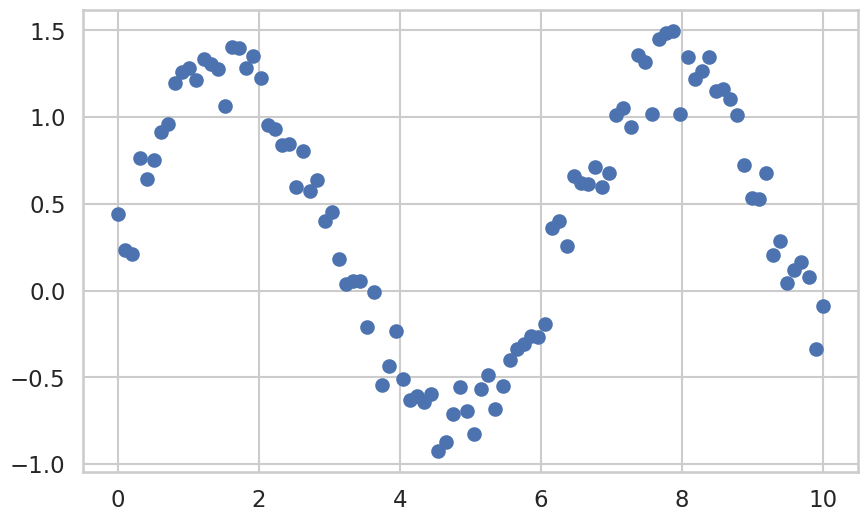

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# membuat data sederhana
X = np.linspace(0, 10, 100).reshape(-1, 1)
Y = np.sin(X).ravel() + np.random.rand(100) * 0.5

# plot data
plt.figure(figsize=(10, 6))
plt.scatter(X, Y)
plt.show()

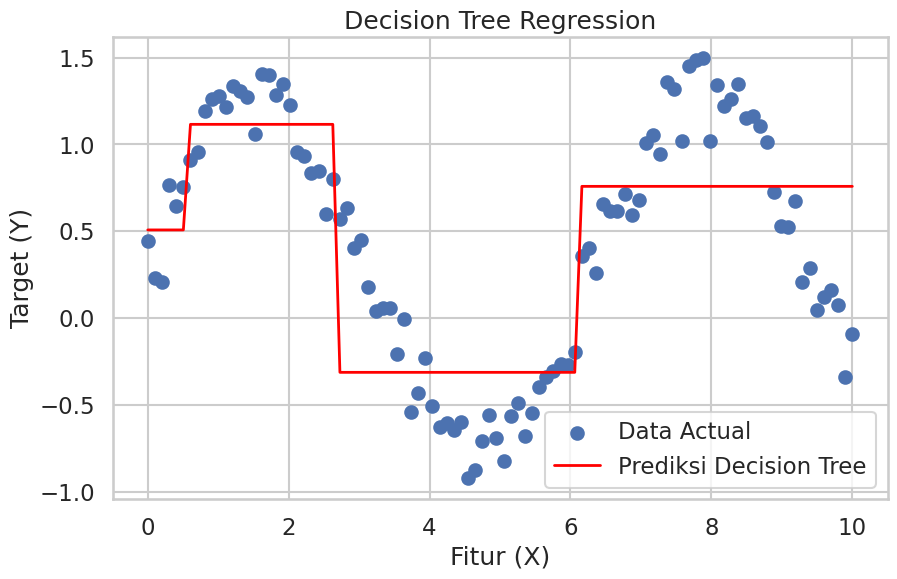

In [28]:
# latih mode decision tree
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, Y)

# prediksi
y_pred = tree_reg.predict(X)

# visualisasi
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Data Actual')
plt.title('Decision Tree Regression')
plt.plot(X, y_pred, color='red', label='Prediksi Decision Tree', linewidth=2)
plt.xlabel('Fitur (X)')
plt.ylabel('Target (Y)')
plt.legend()
plt.show()

#### **Analisis Visual:**

Perhatikan bagaimana garis prediksi merah tidak mulus. Ia terlihat seperti **serangkaian langkah atau "tangga" horizontal**.

Ini adalah ciri khas dari Decision Tree Regressor. Setiap segmen horizontal adalah sebuah **leaf node**. Garisnya datar karena untuk semua nilai `X` di dalam segmen tersebut, model memberikan **satu prediksi konstan yang sama**: yaitu, **rata-rata** dari titik-titik data pelatihan yang ada di segmen itu.

Pohon ini telah belajar untuk memecah data menjadi 4 segmen (karena `max_depth=2` menghasilkan 2² = 4 *leaves*).


### Kesimpulan

* Decision Tree bekerja dengan mengajukan serangkaian pertanyaan sederhana untuk **menyegmentasikan ruang fitur**.
* Untuk regresi, prediksi untuk setiap segmen adalah **nilai rata-rata** dari data pelatihan di segmen tersebut.
* Hasilnya adalah model yang **non-linear** dan prediksinya terlihat seperti **fungsi langkah (step function)**.

**Selanjutnya:**
Sekarang kita tahu *bagaimana* mereka bekerja secara konseptual. Di subchapter berikutnya, kita akan belajar cara **memvisualisasikan struktur pohon itu sendiri** untuk melihat pertanyaan apa yang sebenarnya ia ajukan.
